In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import glam

%load_ext autoreload
%autoreload 2

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Set up sensible parameter bounds first. These are based on the parameter estimates obtained fitting the model to the Krajbich & Rangel (2011) ternary choice data set.

In [2]:
parameter_bounds = dict(v=(0.00003, 0.00015),
                        s=(0.005, 0.011),
                        gamma=(-1, 1),
                        tau=(0.2, 2))

# Testing the `GLAM.simulation` method

## Two groups between subjects

### Simulation from individual parameters

In [3]:
np.random.seed(1)

m_individual = glam.GLAM()

n_items = 3
n_trials = 100

groups = ['A', 'B']
n_groups = len(groups)
N = dict(A=50, B=40)

gamma_mu = dict(A=0.5, B=-0.5)
gamma_sd = dict(A=0.2, B=0.2)

for group in groups:

    parameters = dict(v=np.clip(np.random.normal(loc=0.00007,
                                                 scale=0.00001,
                                                 size=N[group]),
                                *parameter_bounds['v']),
                      gamma=np.clip(np.random.normal(loc=gamma_mu[group],
                                                     scale=gamma_sd[group],
                                                     size=N[group]), 
                                    *parameter_bounds['gamma']),
                      s=np.clip(np.random.normal(loc=0.008,
                                                 scale=0.001,
                                                 size=N[group]),
                                *parameter_bounds['s']),
                      tau=np.clip(np.random.normal(loc=0.8,
                                                   scale=0.1,
                                                   size=N[group]),
                                  *parameter_bounds['tau']),
                      t0=np.zeros(N[group]))
    
    m_individual.simulate_group(kind='individual',
                                parameters=parameters,
                                n_individuals=N[group],
                                n_trials=n_trials,
                                n_items=n_items,
                                label=group)

In [4]:
def plot_model_parameters(model, parameters=['v', 'gamma', 's', 'tau'],
                          parameter_bounds=dict(v=(0.00003, 0.00015),
                                                s=(0.005, 0.011),
                                                gamma=(-1, 1),
                                                tau=(0.2, 2)),
                          n_bins=10):

    fig, axs = plt.subplots(1, len(parameters),
                            figsize=(len(parameters)*3, 3),
                            sharey='row')

    for g, group in enumerate(model.parameters.keys()):
        for p, parameter in enumerate(parameters):
            axs[p].hist(model.parameters[group][parameter],
                        bins=np.linspace(*parameter_bounds[parameter], n_bins),
                        color='C{}'.format(g),
                        alpha=0.75,
                        label=group)
            axs[p].set_title(parameter)
    axs[-1].legend()
    fig.tight_layout()
    
    return fig, axs

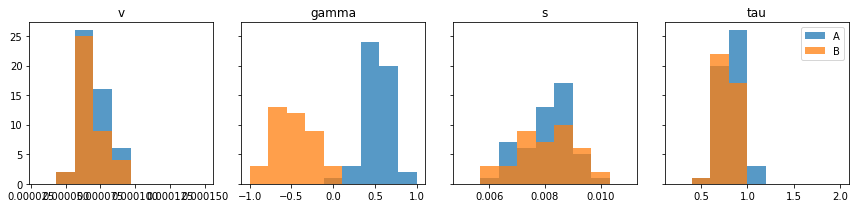

In [5]:
plot_model_parameters(m_individual);

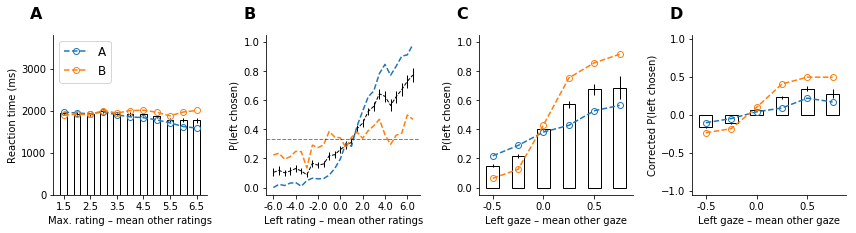

In [6]:
glam.plot_fit(m_individual.data,
              [m_individual.data[m_individual.data['condition'] == group]
               for group in groups],
              prediction_labels=groups);

### Simulation from hyperparameters (hierarchical)

Alternatively, the simulation function can use hyperparameters of normal group distributions for simulation. In this case, the `parameter` dictionary contains one dictionary for each parameter, containing mean (`mu`, `float`), standard deviation (`sd`, `float`) and parameter bounds (`bounds`, `tuple` of length 2). Non-specified parameters in the `parameter` dictionary are filled with default values.

In [7]:
np.random.seed(2)

m_hierarchical = glam.GLAM()

n_items = 3
n_trials = 100

groups = ['A', 'B']
n_groups = len(groups)
N = dict(A=50, B=40)

gamma_mu = dict(A=0.5, B=-0.5)
gamma_sd = dict(A=0.2, B=0.2)

for group in groups:

    parameters = dict(gamma=dict(mu=gamma_mu[group],
                                 sd=gamma_sd[group],
                                 bounds=parameter_bounds['gamma']))
    
    m_hierarchical.simulate_group(kind='hierarchical',
                                  parameters=parameters,
                                  n_individuals=N[group],
                                  n_trials=n_trials,
                                  n_items=n_items,
                                  label=group)

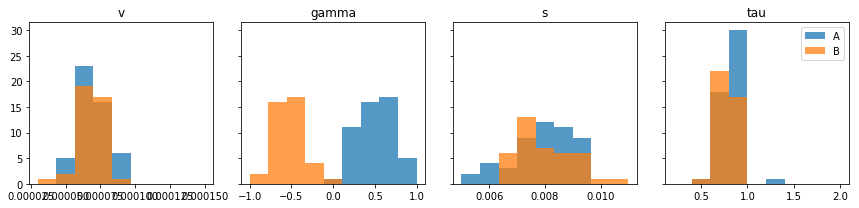

In [8]:
plot_model_parameters(m_hierarchical);

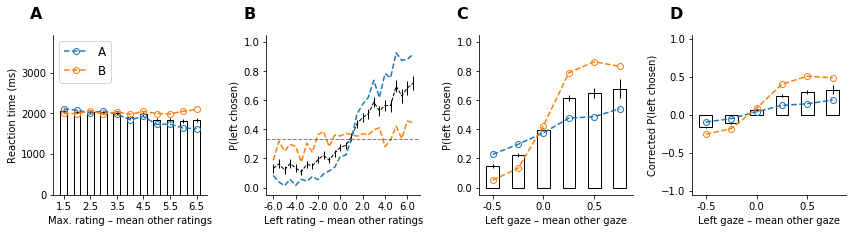

In [9]:
glam.plot_fit(m_hierarchical.data,
              [m_hierarchical.data[m_hierarchical.data['condition'] == group]
               for group in groups],
              prediction_labels=groups);

## TODO: Within subject design

## TODO: Use pre-existing value and gaze data

The above examples generate stimulus values and gaze data. These can also be supplied as `values` and `gaze` arguments.

### individual

In [10]:
# not implemented yet

### hierarchical

In [11]:
# not implemented yet